In [33]:
# pip install statsmodels

import numpy as np
import pandas as pd

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt

data_url = 'https://raw.githubusercontent.com/data-to-insight/ERN-sessions/main/data/diabetes_data.csv'

df = pd.read_csv(data_url)

# We want to see if we can predict blood glucose with BMI
# Later in the course we'll use the same data to see if other factors can predict diabetes in different ways

#We are going for a linear regression which assumes that as one variable increases, the other variable will
# increase in a linear fashion, as in, with the same gradient, so the relationship will be a straight line, 
# not, for instance, an exponential relationship (such as the intensity of light compared to distance from it).
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [34]:
# X is our observable, our independant variable, the thing that changes we are saying may influence our outcome variable
# We need to reshape our variables to numpy so we can use them in SKLearn, it might seem weird but we do it every time so get used to it!
X = df['BMI'].to_numpy().reshape(-1, 1) # NP arrarys are similar to liosts but they're faster to run, and more strict


# y is our independent varible, the thing we think is changed by the other variable, we assume/test for a caqusal relationship between the two
y = df['Glucose'].to_numpy().reshape(-1, 1)


In [35]:
# For ML we need to give the model something to LEARN with, and then some data to test the model with to see how good it is.
# We need to split our X and y into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [36]:
# Next we make a variable that contains the linear regression information, but it's not 
# like a normal variable, it's technically a 'Class' object that contains lots of types of info, and methods related to it, 
# but best to just think of it as a variable with different info stores in it.

regr = linear_model.LinearRegression()

#Now we will give it our training data and it'll work out a model that best fits the data.
# There's lots of different ways of building a linear regression model,
# The SKLearn regression uses an OLS model, which is one of the simplest and most common.
# It finds a line that fits the data best by drawing one such that, if we add and square the
# distance between every point and the line, it has the shortest total squared distance.
regr.fit(X_train, y_train)

# We have now built our model and we can predict what our y values will be for a given X (so blood glucose for a given BMI)
y_pred = regr.predict(X_test)

In [37]:
# The coefficients
# We have only used one variable so we only get one coefficient, it tells us the degree to which
# the X influences the y, in the most simple terms for our example it is the gradient of the line.
# If we had more variables we'd have more coefficients allowing us to make more complex predicitons.
print("Coefficients: \n", regr.coef_)


# The mean squared error
# This is a measure of the quality of the estimator, a good MSE is closer to 0 but there is no 'acceptable' 
# MSE, more we want to select variables, and sets of variables htat improve it.
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))


# The coefficient of determination: 1 is perfect prediction, we can think of it as how good our 
#correlation is. We have a value of 0.05 which is not good. 0.7 is around the starting point for a good corellation.
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficients: 
 [[0.88558366]]
Mean squared error: 1070.59
Coefficient of determination: 0.05


>Here coefficientnt is feature importance, or how much weight the feature provides in the analysis, magnitude of feature importance is relative. Here we have only one value so we can't do much with relative importance.


> Mean Squared Error is the average of the squares of our errors, lower values mean lower error, lower values mean the forecast is closer to the actual values, lower means better fit. Again, we would use this to compare it to MSE in another model to see which model does best.


> R squared a statistical measure in a regression model that determines the proportion of variance in the dependent variable that can be explained by the independent variable. In other words, r-squared shows how well the data fit the regression model (the goodness of fit). It says how many of the predictors explain the variation in y.

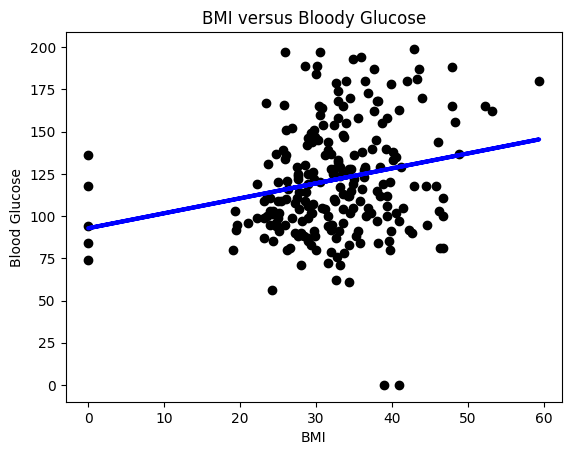

In [38]:
# Plot outputs
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)

plt.xlabel('BMI')
plt.ylabel('Blood Glucose')

plt.title('BMI versus Bloody Glucose')

plt.show()

In [39]:
mod = sm.OLS(y_pred,X_test)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
p_values

x1    1.088842e-167
Name: P>|t|, dtype: float64

The p value is a number, calculated from a statistical test, that describes how likely you are to have found a particular set of observations if the null hypothesis were true. P values are used in hypothesis testing to help decide whether to reject the null hypothesis. The smaller the p value, the more likely you are to reject the null hypothesis. In this case the null hypothesis is that BMI doesn't predict blood glucose. The p value is a proportion: if your p value is 0.05, that means that 5% of the time you would see a test statistic at least as extreme as the one you found if the null hypothesis was true. 1.088842e-167 is a tiny tiny number, so is strong evidence that BMI is correlated with glucose.

In [40]:
# We are gonna add new data points based on our prediciton model so we can draw an extended
# line on our plot to predict further BMI/GLucose values
prediction_df = pd.DataFrame()
prediction_df['BMI'] = np.arange(60, 70)
prediction_df['Glucose'] = regr.predict(np.arange(60, 70).reshape(-1, 1))

prediction_df

,BMI,Glucose
0,60,145.940854
1,61,146.826438
2,62,147.712022
3,63,148.597605
4,64,149.483189
5,65,150.368773
6,66,151.254356
7,67,152.139940
8,68,153.025524
9,69,153.911107


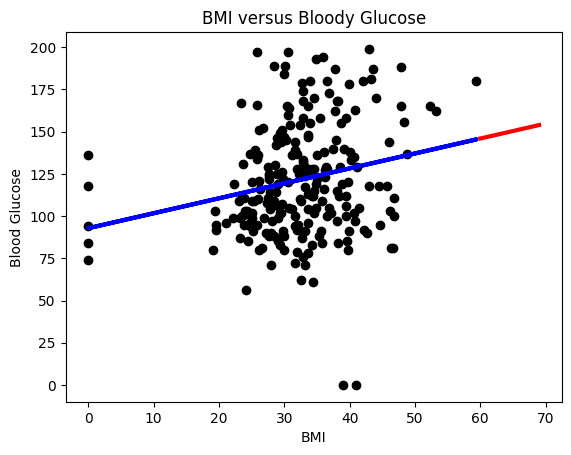

In [41]:
# Now lets draw the new plot!

plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)

plt.xlabel('BMI')
plt.ylabel('Blood Glucose')

plt.title('BMI versus Bloody Glucose')

plt.plot(prediction_df['BMI'], prediction_df['Glucose'], color="red", linewidth=3)
plt.show()

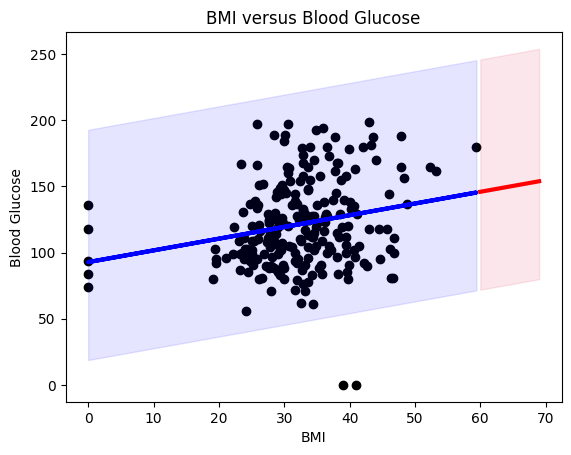

In [80]:
import statsmodels.api as sm
alpha = 0.05 # 95% confidence interval
lr = sm.OLS(y_train, sm.add_constant(X_train)).fit()
conf_interval = lr.conf_int(alpha)

conf_interval

lr_df = pd.DataFrame({'BMI':X_test.ravel(),
                      'Glucose':y_pred.ravel()})

lr_df = lr_df.sort_values('BMI')

plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)
# plt.fill_between(X_test.ravel(), (y_pred.ravel() - 74), (y_pred.ravel() + 100), alpha=.1, color='blue')
plt.fill_between(lr_df['BMI'], (lr_df['Glucose'] - 74), (lr_df['Glucose']  + 100), alpha=.1, color='blue')

plt.xlabel('BMI')
plt.ylabel('Blood Glucose')

plt.title('BMI versus Blood Glucose')

plt.plot(prediction_df['BMI'], prediction_df['Glucose'], color="red", linewidth=3)

plt.fill_between(prediction_df['BMI'], (prediction_df['Glucose'] - 74), (prediction_df['Glucose'] + 100), alpha=.1, color='crimson')
plt.show()

In [ ]:
# Multiple linear regression predicitons
# Multiple regression - we won't plot this as we'd need a 3d plot! But we can still make predicitons
# We don't have to reshape it to an array now, the two pandas series together are the right shape!
X = df[['BMI', 'BloodPressure']] 
y = list(df['Glucose'])#.to_numpy().reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
regr = linear_model.LinearRegression()

regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

print("Coefficients: \n", regr.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

mod = sm.OLS(y_pred,X_test)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
print(p_values)

regr.predict(pd.DataFrame([{'BMI':60,
                     'BloodPressure':100}]))

Coefficients: 
 [0.82888029 0.09844378]
Mean squared error: 1053.80
Coefficient of determination: 0.07
BMI              1.195669e-34
BloodPressure    4.676373e-23
Name: P>|t|, dtype: float64


array([147.40054992])

In [ ]:
# import statsmodels.api as sm
# alpha = 0.05 # 95% confidence interval
# lr = sm.OLS(y_train, sm.add_constant(X_train)).fit()
# conf_interval = lr.conf_int(alpha)

# conf_interval

# plt.scatter(X_test, y_test, color="black")
# plt.plot(X_test, y_pred, color="blue", linewidth=3)

# plt.xlabel('BMI')
# plt.ylabel('Blood Glucose')

# plt.title('BMI versus Bloody Glucose')

# plt.plot(prediction_df['BMI'], prediction_df['Glucose'], color="red", linewidth=3)
# plt.fill_between(prediction_df['BMI'], (prediction_df['Glucose'] - 74), (prediction_df['Glucose'] + 100), alpha=.1, color='crimson')
# plt.show()